In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image

import torch
from sklearn.model_selection import train_test_split
import random
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# Rest of the code remains the same...
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
print(device)

cuda


In [5]:
import os
import pandas as pd

train_dir = "C:/Users/db/Desktop/image_tutorial/cancer_image-20230730T071512Z-001/cancer_image"

In [6]:
train_df = pd.DataFrame(columns=['image_path', 'label'])

In [7]:
for label, directory in enumerate(os.listdir(train_dir)):
    for filename in os.listdir(os.path.join(train_dir, directory)):
        image_path = os.path.join(train_dir, directory, filename)
        train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)


In [8]:
train_df

,image_path,label
0,C:/Users/db/Desktop/image_tutorial/cancer_imag...,0
1,C:/Users/db/Desktop/image_tutorial/cancer_imag...,0
2,C:/Users/db/Desktop/image_tutorial/cancer_imag...,0
3,C:/Users/db/Desktop/image_tutorial/cancer_imag...,0
4,C:/Users/db/Desktop/image_tutorial/cancer_imag...,0
...,...,...
585,C:/Users/db/Desktop/image_tutorial/cancer_imag...,19
586,C:/Users/db/Desktop/image_tutorial/cancer_imag...,19
587,C:/Users/db/Desktop/image_tutorial/cancer_imag...,19
588,C:/Users/db/Desktop/image_tutorial/cancer_imag...,19


In [9]:
train_df.iloc[3, 0]

'C:/Users/db/Desktop/image_tutorial/cancer_image-20230730T071512Z-001/cancer_image\\5002\\전 (20).JPG'

In [10]:
# 각 이미지의 이름과 라벨을 저장
df = train_df

In [11]:
labels = os.listdir(train_dir)

In [12]:
# label_map을 만듬
label_map = {i: label for i, label in enumerate(labels)}
num_classes=len(label_map)
label_map

{0: '5002',
 1: '5086',
 2: '5094',
 3: '5119',
 4: '5120',
 5: '5138',
 6: '5169',
 7: '5176',
 8: '5180',
 9: '5182',
 10: '5202',
 11: '5206',
 12: '5219',
 13: '5343',
 14: '5344',
 15: '5357',
 16: '5364',
 17: '5366',
 18: '5399',
 19: '5408'}

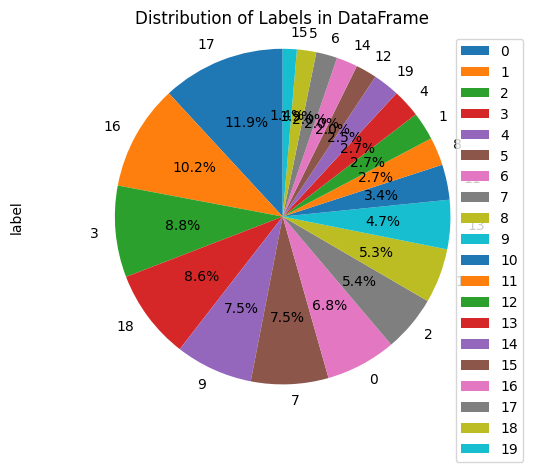

In [13]:
# Plot pie chart of train_df
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Labels in DataFrame')
plt.legend(df['label'].unique())
plt.show()

In [14]:
# Count the number of images in each class
class_counts = df['label'].value_counts().sort_index()

# Print the number of images in each class
print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in label_map.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
0               5002                           40        
1               5086                           16        
2               5094                           32        
3               5119                           52        
4               5120                           16        
5               5138                           11        
6               5169                           12        
7               5176                           44        
8               5180                           16        
9               5182                           44        
10              5202                           31        
11              5206                           20        
12              5219                           12        
13              5343                           28 

In [16]:
max_images_per_class = 300
df = df.groupby("label").apply(lambda x: x.head(max_images_per_class)).reset_index(drop=True)

In [17]:
import multiprocessing

# Get the number of CPU cores available
max_workers = multiprocessing.cpu_count()
max_workers

24

In [18]:
import concurrent.futures

# Define a function to resize image arrays
def resize_image_array(image_path):
    try:
        return np.asarray(Image.open(image_path).resize((75, 100)))
    except Exception as e:
        return None

# Use concurrent.futures to parallelize the resizing process
with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
    # Use executor.map to apply the function to each image path in the DataFrame
    image_arrays = list(executor.map(resize_image_array, df['image_path'].tolist()))

# Add the resized image arrays to the DataFrame
df['image'] = image_arrays
del image_arrays

In [19]:
# import pickle
# with open("/content/drive/MyDrive/image_tutorial/arrang_df","rb") as fr:
#     df = pickle.load(fr)

In [20]:
df.head

<bound method NDFrame.head of                                             image_path label  \
0    C:/Users/db/Desktop/image_tutorial/cancer_imag...     0   
1    C:/Users/db/Desktop/image_tutorial/cancer_imag...     0   
2    C:/Users/db/Desktop/image_tutorial/cancer_imag...     0   
3    C:/Users/db/Desktop/image_tutorial/cancer_imag...     0   
4    C:/Users/db/Desktop/image_tutorial/cancer_imag...     0   
..                                                 ...   ...   
585  C:/Users/db/Desktop/image_tutorial/cancer_imag...    19   
586  C:/Users/db/Desktop/image_tutorial/cancer_imag...    19   
587  C:/Users/db/Desktop/image_tutorial/cancer_imag...    19   
588  C:/Users/db/Desktop/image_tutorial/cancer_imag...    19   
589  C:/Users/db/Desktop/image_tutorial/cancer_imag...    19   

                                                 image  
0    [[[128, 126, 106], [146, 164, 153], [142, 159,...  
1    [[[178, 186, 192], [170, 179, 189], [159, 163,...  
2    [[[215, 214, 219], [216, 

In [21]:
# Count the number of images in each class
class_counts = df['label'].value_counts().sort_index()

# Print the number of images in each class
print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in label_map.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
0               5002                           40        
1               5086                           16        
2               5094                           32        
3               5119                           52        
4               5120                           16        
5               5138                           11        
6               5169                           12        
7               5176                           44        
8               5180                           16        
9               5182                           44        
10              5202                           31        
11              5206                           20        
12              5219                           12        
13              5343                           28 

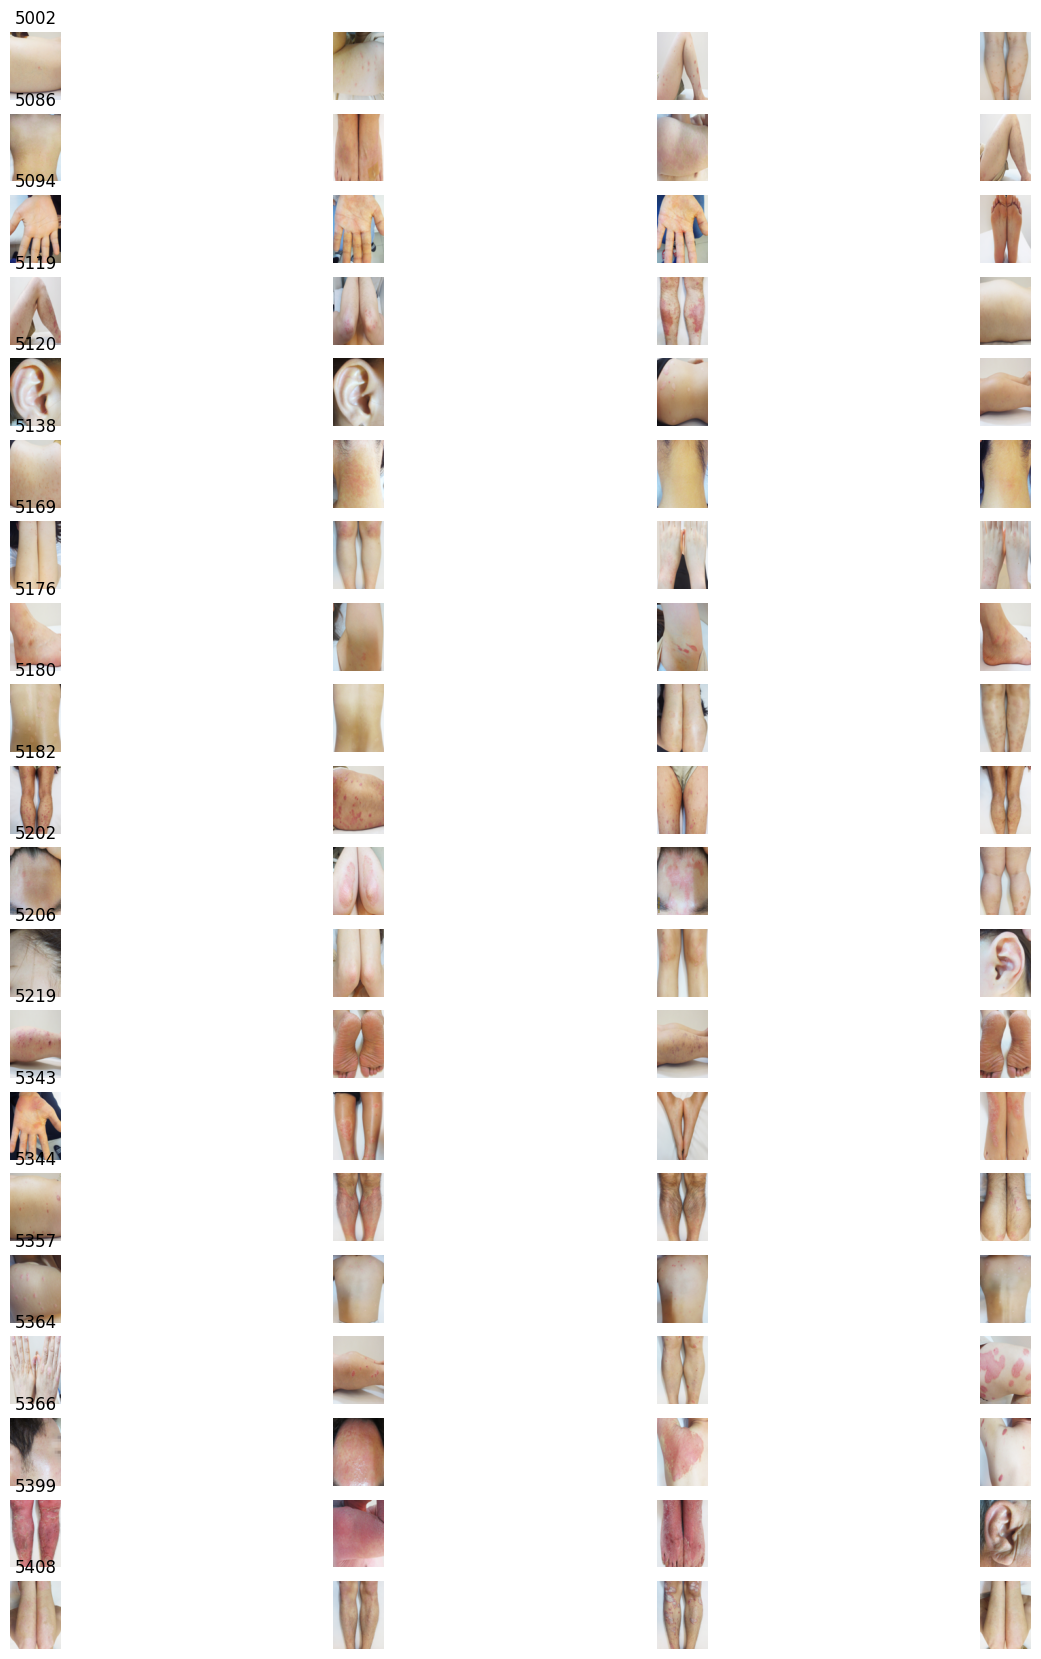

In [22]:
n_samples = 4
fig, m_axs = plt.subplots(num_classes, n_samples, figsize=(4*n_samples, 3*7))
for n_axs, (class_idx, class_rows) in zip(m_axs, df.sort_values(['label']).groupby('label')):
    class_name = label_map[class_idx] # get the class name using label_map
    n_axs[0].set_title(class_name)
    for c_ax, (_, c_row) in zip(n_axs, class_rows.sample(n_samples, random_state=5).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [23]:
df['image'].map(lambda x: x.shape).value_counts()

(100, 75, 3)    590
Name: image, dtype: int64

In [24]:
# Count the number of images in each class
class_counts = df['label'].value_counts().sort_index()

# Print the number of images in each class
print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in label_map.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
0               5002                           40        
1               5086                           16        
2               5094                           32        
3               5119                           52        
4               5120                           16        
5               5138                           11        
6               5169                           12        
7               5176                           44        
8               5180                           16        
9               5182                           44        
10              5202                           31        
11              5206                           20        
12              5219                           12        
13              5343                           28 

In [27]:
# Count the number of images in each class
class_counts = df['label'].value_counts().sort_index()

# Print the number of images in each class
print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in label_map.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
0               5002                           40        
1               5086                           16        
2               5094                           32        
3               5119                           52        
4               5120                           16        
5               5138                           11        
6               5169                           12        
7               5176                           44        
8               5180                           16        
9               5182                           44        
10              5202                           31        
11              5206                           20        
12              5219                           12        
13              5343                           28 

In [28]:
features = df.drop(columns=['label','image_path'],axis=1)
target = df['label']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, stratify=target)
x_train = np.asarray(x_train['image'].tolist())
x_test = np.asarray(x_test['image'].tolist())
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2,shuffle=True)

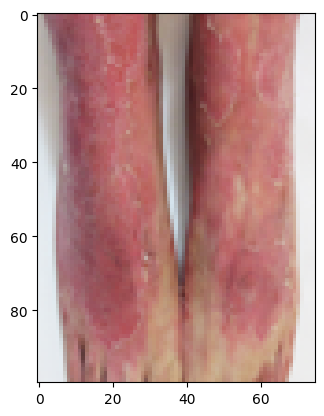

In [29]:
plt.imshow(x_train[0])
plt.show()

In [32]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import ToTensor, ToPILImage
ToPILImage_ = ToPILImage() 
ToTensor_ = ToTensor()

def Tensor_data(x_train,y_train):
    tensor_images = [ToTensor_(image) for image in x_train]
    x_train = torch.stack(tensor_images)
    y_train = y_train.to_numpy()
    y_train = y_train.astype(int)
    y_train = torch.LongTensor(y_train)
    return x_train, y_train ,

In [33]:
x_test.shape

(118, 100, 75, 3)

In [34]:
x_test,y_test = Tensor_data(x_test,y_test)
x_train,y_train = Tensor_data(x_train,y_train)
x_validate,y_validate = Tensor_data(x_validate,y_validate)

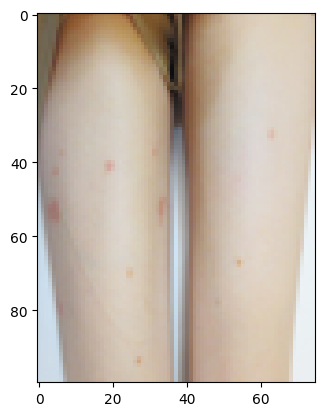

In [39]:
a = ToPILImage()(x_test[10])
plt.imshow(a)
plt.show()

In [42]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader # 데이터로더
dataset = TensorDataset(x_train, y_train)
testdata = TensorDataset(x_test, y_test)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True , drop_last=True)
testloader = DataLoader(testdata, batch_size=64, shuffle=True , drop_last=True)

In [43]:
print(x_train.size())  # 예상 출력: (배치 크기, 채널 수, 높이, 너비)
print(y_train.size())   

torch.Size([377, 3, 100, 75])
torch.Size([377])


In [57]:
import torch.nn as nn
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5
        # L1 ImgIn shape=(?, 100, 75, 3)
        #    Conv     -> (?, 100, 75, 32)
        #    Pool     -> (?, 50, 37, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        # L2 ImgIn shape=(?, 50, 37, 32)
        #    Conv      ->(?, 50, 37, 64)
        #    Pool      ->(?, 25, 18, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        # L3 ImgIn shape=(?, 25, 18, 64)
        #    Conv      ->(?, 25, 18, 128)
        #    Pool      ->(?, 13, 10, 128)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))
        
        # L4 FC 13x10x128 inputs -> 625 outputs
        self.fc1 = torch.nn.Linear(13 * 10 * 128, 625, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1 - self.keep_prob))
        
        # L5 Final FC 625 inputs -> 10 outputs
        self.fc2 = torch.nn.Linear(625, 20, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.layer4(out)
        out = self.fc2(out)
        return out

# 모델 인스턴스 생성
model = CNN().to(device)

# 모델 정보 출력
model.train()

CNN(
  (layer1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=16640, out_features=625, bias=True)
  (layer4): Sequential(
    (0): Linear(in_features=16640, out_features=625, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (fc2): Linear(in_features=625, out_features=20, bias=True)
)

In [58]:
# Hyperparameters

learning_rate = 0.001
training_epochs = 800
batch_size = 100
criterion = nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [59]:
total_batch = len(dataloader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 5


In [60]:
def train():
    for epoch in range(training_epochs):
        avg_cost = 0
        for X,Y in dataloader:
            X = X.to(device)  
            Y = Y.to(device)
            optimizer.zero_grad()
            hypothesis = model(X)
            cost = criterion(hypothesis,Y)
            cost.backward()
            optimizer.step()
            avg_cost += cost/total_batch
            print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

In [61]:
train()

[Epoch:    1] cost = 0.598737121
[Epoch:    1] cost = 1.17719555
[Epoch:    1] cost = 1.77857089
[Epoch:    1] cost = 2.35328031
[Epoch:    1] cost = 2.92217588
[Epoch:    2] cost = 0.573425174
[Epoch:    2] cost = 1.1482954
[Epoch:    2] cost = 1.71345425
[Epoch:    2] cost = 2.28003693
[Epoch:    2] cost = 2.84381104
[Epoch:    3] cost = 0.557090759
[Epoch:    3] cost = 1.12385941
[Epoch:    3] cost = 1.69211781
[Epoch:    3] cost = 2.23571587
[Epoch:    3] cost = 2.77906561
[Epoch:    4] cost = 0.552548647
[Epoch:    4] cost = 1.09106088
[Epoch:    4] cost = 1.60524106
[Epoch:    4] cost = 2.14071155
[Epoch:    4] cost = 2.68635345
[Epoch:    5] cost = 0.50676769
[Epoch:    5] cost = 0.988130569
[Epoch:    5] cost = 1.49610221
[Epoch:    5] cost = 1.99744141
[Epoch:    5] cost = 2.47593594
[Epoch:    6] cost = 0.487637192
[Epoch:    6] cost = 0.915166497
[Epoch:    6] cost = 1.3685298
[Epoch:    6] cost = 1.83315361
[Epoch:    6] cost = 2.2809124
[Epoch:    7] cost = 0.427403897
[Ep

In [ ]:
with torch.no_grad():
    total_correct = 0
    total_samples = 0
    
    for a in range(2):
        for X, Y in testloader:
            X = X.to(device)
            Y = Y.to(device)
            
            predictions = model(X)
            correct_prediction = torch.argmax(predictions, 1) == Y
            total_correct += correct_prediction.sum().item()
            total_samples += Y.size(0)  # 배치 내의 총 샘플 수
            
    
    accuracy = total_correct / total_samples
    print("Total Correct Predictions:", total_correct)
    print("Total Samples:", total_samples)
    print("Accuracy:", accuracy)


In [ ]:
import random

i = random.randint(0, 63)  

for batch_idx, (X, Y) in enumerate(testloader):
        X = X.to(device)
        Y = Y.to(device)

        # X[0]의 shape 출력
        predictions = model(X)
        prediction= predictions[i].cpu().detach().numpy()
        y_predict = np.argmax(prediction)
        y_real = Y[i]
        print('Label:', y_real)
        print('predicitons :', y_predict)
        
        
        plt.imshow(ToPILImage()(X[i]))
        plt.show()